(78483, 3)


C:\Users\admin\AppData\Local\Temp\ipykernel_15732\2704975004.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_classes['Name'] = le.fit_transform(df_top_classes['Name'])


Iteration 1, loss = 1.49722908
Iteration 2, loss = 1.43071210
Iteration 3, loss = 1.42169915
Iteration 4, loss = 1.41879950
Iteration 5, loss = 1.41750381
Iteration 6, loss = 1.41694829
Iteration 7, loss = 1.41537445
Iteration 8, loss = 1.41517058
Iteration 9, loss = 1.41354497
Iteration 10, loss = 1.41332969
Iteration 11, loss = 1.41263190
Iteration 12, loss = 1.41292920
Iteration 13, loss = 1.41218429
Iteration 14, loss = 1.41185602
Iteration 15, loss = 1.41179961
Iteration 16, loss = 1.41218740
Iteration 17, loss = 1.41103872
Iteration 18, loss = 1.41038064
Iteration 19, loss = 1.41108127
Iteration 20, loss = 1.41096098
Iteration 21, loss = 1.41038326
Iteration 22, loss = 1.41059798
Iteration 23, loss = 1.41006105
Iteration 24, loss = 1.40998247
Iteration 25, loss = 1.41061449
Iteration 26, loss = 1.41020050
Iteration 27, loss = 1.40992830
Iteration 28, loss = 1.41013479
Iteration 29, loss = 1.41029512
Iteration 30, loss = 1.40974179
Iteration 31, loss = 1.40979984
Iteration 32, los

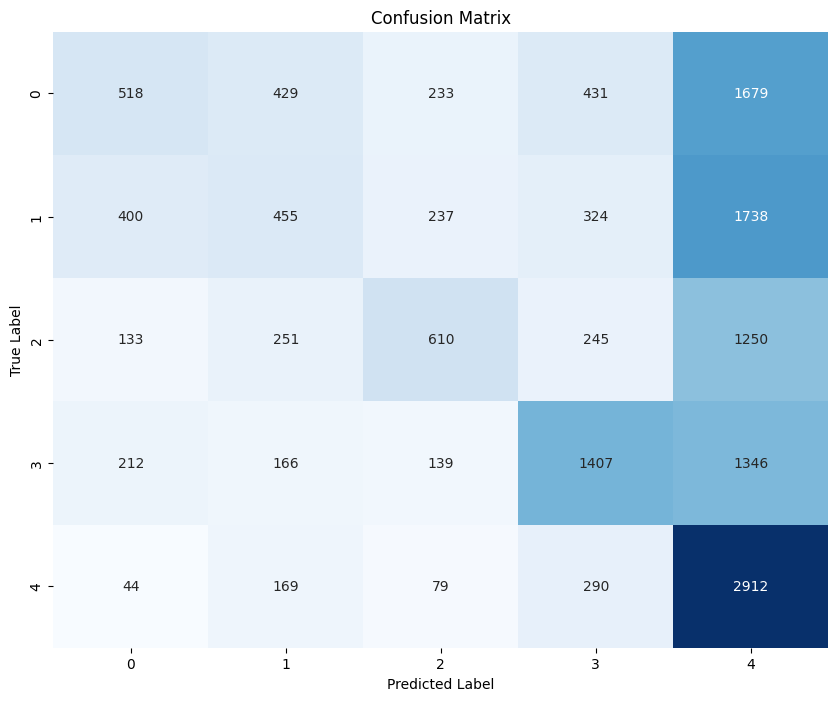

In [2]:
import pandas as pd
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('final_all_names_code.csv')

# Get the top five most frequent classes
top_classes = df['Country'].value_counts().head(5).index.tolist()

# Filter the DataFrame to include only the top five classes
df_top_classes = df[df['Country'].isin(top_classes)]

# Display the shape of the filtered DataFrame
print(df_top_classes.shape)

# Define the list of columns for the new DataFrame
columns = list(string.ascii_lowercase) + ['Country_code', 'Country']

# Initialize an empty list to store dictionaries for each row
rows = []

# Loop through the filtered DataFrame and populate the list of dictionaries
for ind in range(len(df_top_classes)):
    name = df_top_classes['Name'].iloc[ind]
    nameLst = str(name).split(' ')
    lastName = nameLst[-1].lower()
    chars = dict.fromkeys(columns, 0)
    for i in lastName:
        chars[i] = 1
    chars['Country_code'] = df_top_classes['Country_code'].iloc[ind]
    chars['Country'] = df_top_classes['Country'].iloc[ind]
    # Append the dictionary for the current row to the list
    rows.append(chars)

# Convert the list of dictionaries into a DataFrame
newdf = pd.DataFrame(rows)

# Encode the 'Name' column using LabelEncoder
le = LabelEncoder()
df_top_classes['Name'] = le.fit_transform(df_top_classes['Name'])

# Define features (X) and target (Y)
X = newdf[list(string.ascii_lowercase)]
Y = newdf['Country']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Initialize and train the MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(6, 5),
                    random_state=0,
                    verbose=True,
                    learning_rate_init=0.01)
clf.fit(X_train, Y_train)

# Predict the target values for the test set
Y_pred = clf.predict(X_test)

# Calculate and display the accuracy score
print("Accuracy:", accuracy_score(Y_test, Y_pred))

# Generate a confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
